# SoilMoisture

## Overview

This notebook demonstrates how to open and explore the netCDF file, visualize the data, and to a Delta Tabler.

![Volumetric soil moisture at various soil depths](https://raw.githubusercontent.com/ornldaac/netcdf_open_visualize_csv/master/resources/py-nc-visualize.png)

## Source Data

The source data is a netCDF file ([soil_moist_20min_Kendall_AZ_n1400.nc](https://daac.ornl.gov/daacdata/eos_land_val/SoilSCAPE/data//soil_moist_20min_Kendall_AZ_n1400.nc)) consisting of  volumetric root zone soil moisture data from a location in Kendall, Arizona, USA. This data was collected as a part of SoilSCAPE (Soil moisture Sensing Controller and Optimal Estimator) project (https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1339)

## Prerequisites
### Packages
Python 3 or later. Python modules: netCDF4, numpy, pandas, matplotlib, xarray
### Data Storage
The source data is stored in a external storage mount attached to the Databricks cluster

## Tutorial
In this tutorial, we will open and explore the netCDF file, visualize the data, and export to a comma-separated file (CSV). 

### 1. Import python modules
First import the required modules:

In [0]:
%pip install netcdf4 xarray

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
%matplotlib inline

import pandas as pd 
import numpy as np
import netCDF4 as nc 
import xarray as xr
import matplotlib.pyplot as plt

### 2. Read and explore the netCDF file
Read in the netCDF file from the mount into 'in_nc'.

In [0]:
DATA_DIR = "dbfs/mnt/raw/SoilSCAPE_1339"

In [0]:
in_nc = xr.open_dataset(f"{DATA_DIR}/soil_moist_20min_Kendall_AZ_n1400.nc")
in_nc

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File /local_disk0/.ephemeral_nfs/envs/pythonEnv-33bee6d7-c118-4373-8573-9d04457c1739/lib/python3.10/site-packages/xarray/backends/file_manager.py:210, in CachingFileManager._acquire_with_cache_info(self, needs_lock)
    209 try:
--> 210     file = self._cache[self._key]
    211 except KeyError:

File /local_disk0/.ephemeral_nfs/envs/pythonEnv-33bee6d7-c118-4373-8573-9d04457c1739/lib/python3.10/site-packages/xarray/backends/lru_cache.py:56, in LRUCache.__getitem__(self, key)
     55 with self._lock:
---> 56     value = self._cache[key]
     57     self._cache.move_to_end(key)

KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('/databricks/driver/dbfs/mnt/raw/SoilSCAPE_1339/soil_moist_20min_Kendall_AZ_n1400.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '7785fdb6-6b69-46e8-a9be-cbd083bcea9a'

### 2. Create daily average soil moisture plot
To create soil moisture plots aggregated by day, we will first put the data into a *pandas dataframe*, which let you organize data in a meaningful tabular data structure and does time aggregation easily.

In [0]:
df = in_nc.to_dataframe()
df = df.pivot_table(values=["soil_moisture"], index="time", columns="depth")
df.index = pd.DatetimeIndex(d.index)
df

Now we will convert the original (~ half-hourly) data to daily using *Pandas's `resample()` function"*. 'D' means daily, 'M' means monthly etc. More aliases are listed [here](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases). Notice that we are using "numpy's nanmean" instead of "mean" to exclude all NaN values. Ignore any run time warning messages.

In [0]:
# df_daily = df.groupby(pd.Grouper(freq='D', level='time')).aggregate(np.nanmean)
df_daily = df.resample("D").agg(np.nanmean)

df_daily.head(5)

We will now create plot of daily time series of soil moisture measured at soil depths (5, 15 and 30cm) using python's matplotlib module:

Text(0, 0.5, 'Soil Moisture')

<Figure size 640x480 with 0 Axes>

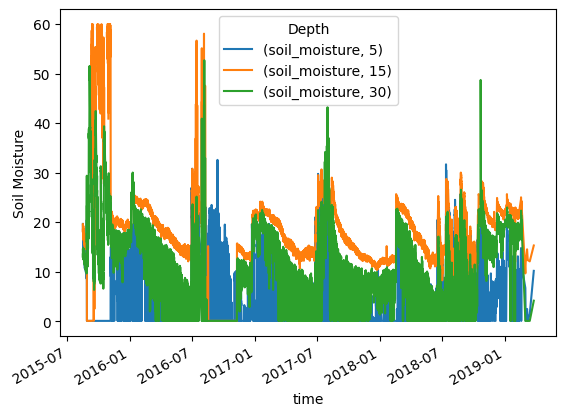

In [0]:
ylabel_name = 'Soil Moisture'
series_name = 'Depth'

plt.figure()
df.plot()
plt.legend(title=series_name)
plt.ylabel(ylabel_name)